In [1]:
!unzip '/Users/manaswini/Desktop/NeuroNexus/MOVIE RATING PREDICTION WITH PYTHON/IMDB movie data set.zip'

Archive:  /Users/manaswini/Desktop/NeuroNexus/MOVIE RATING PREDICTION WITH PYTHON/IMDB movie data set.zip
  inflating: IMDb Movies India.csv   


In [56]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [57]:
!file -i '/Users/manaswini/Desktop/NeuroNexus/MOVIE RATING PREDICTION WITH PYTHON/IMDb Movies India.csv'

/Users/manaswini/Desktop/NeuroNexus/MOVIE RATING PREDICTION WITH PYTHON/IMDb Movies India.csv: regular file


In [58]:
data = pd.read_csv('/Users/manaswini/Desktop/NeuroNexus/MOVIE RATING PREDICTION WITH PYTHON/IMDb Movies India.csv', encoding='latin-1')

In [59]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [60]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [61]:
data.shape

(15509, 10)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [63]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [64]:
data.columns.unique()

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Handle the missing data

In [65]:
# Convert 'Year' to string and then extract digits
data['Year'] = data['Year'].astype(str).str.extract('(\d+)').astype(float)

# Use loc to fill missing values with the mean
data.loc[data['Year'].isnull(), 'Year'] = data['Year'].mean()


In [66]:
data['Duration'] = data['Duration'].apply(lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else np.nan)
data['Duration'] = pd.to_numeric( data['Duration'], errors='coerce')

In [67]:
# Convert 'Votes' to numeric, handling errors
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

# Use loc to fill missing values with the mean
data.loc[data['Votes'].isnull(), 'Votes'] = data['Votes'].mean()


In [68]:
# List of columns to fill missing values for
columns_to_fill = ['Year', 'Duration', 'Rating', 'Votes']

# Fill missing values with the mean for each column
data[columns_to_fill] = data[columns_to_fill].apply(lambda x: x.fillna(x.mean()))


In [32]:
data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [34]:
# List of columns to fill missing values for
columns_to_fill = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Fill missing values with the mode for each column
data[columns_to_fill] = data[columns_to_fill].apply(lambda x: x.fillna(x.mode()[0]))


In [35]:
data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [36]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1987.0,128,Drama,5.841621,120.839493,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90,"Drama, Musical",5.841621,120.839493,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105,Drama,5.841621,120.839493,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


DATA VISUALIZATION

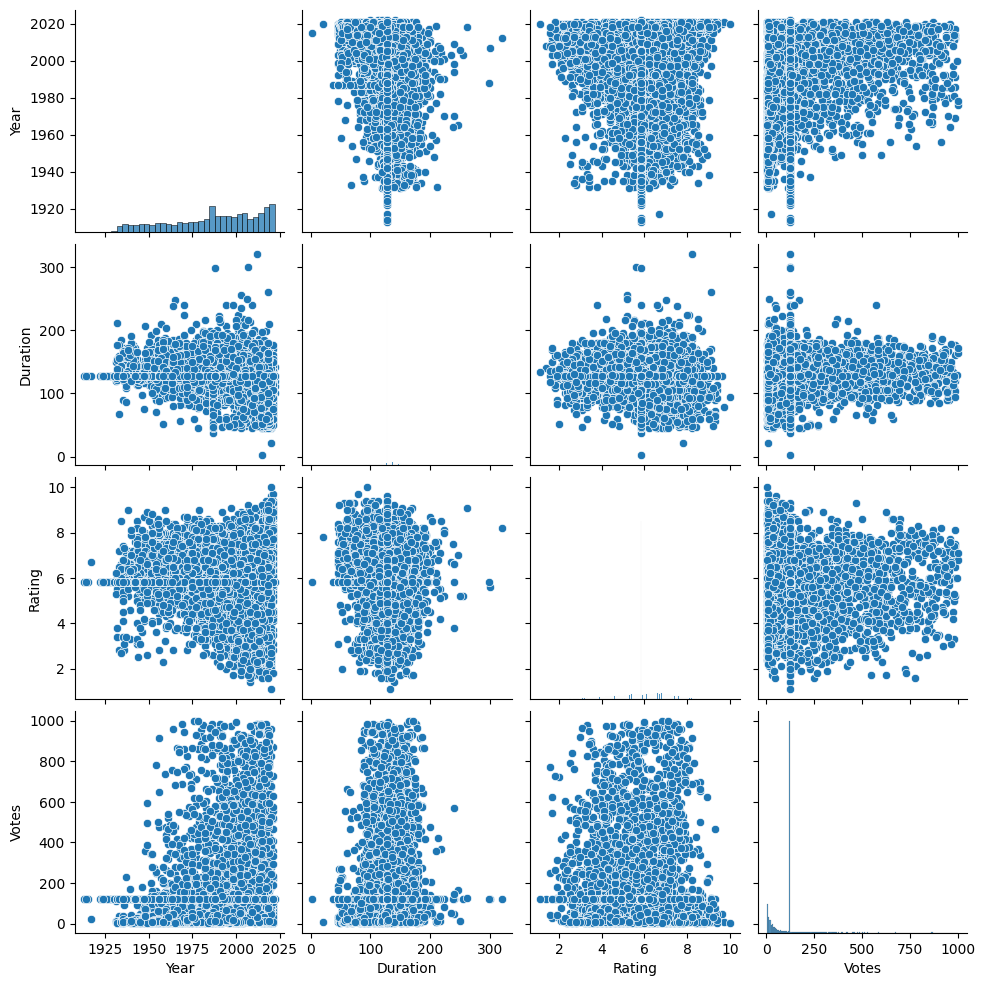

In [37]:
sns.pairplot(data[['Year', 'Duration', 'Rating', 'Votes']])
plt.show()

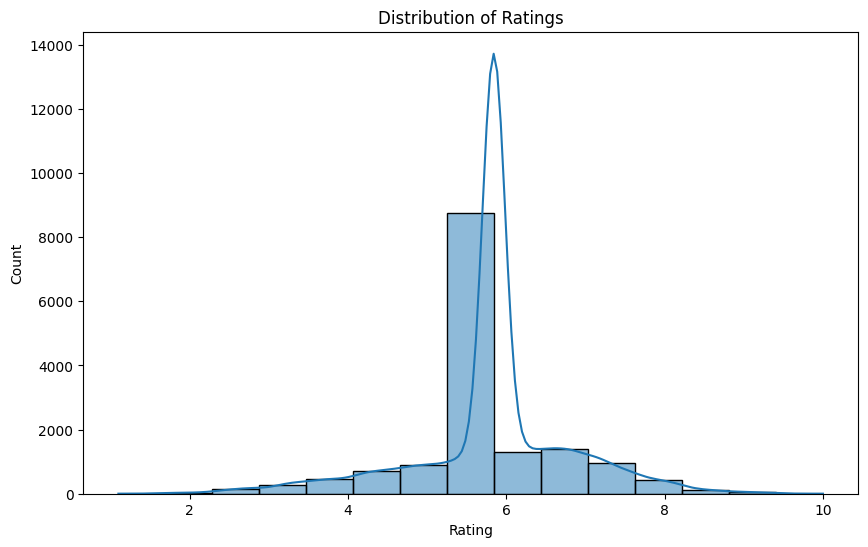

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=15, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()

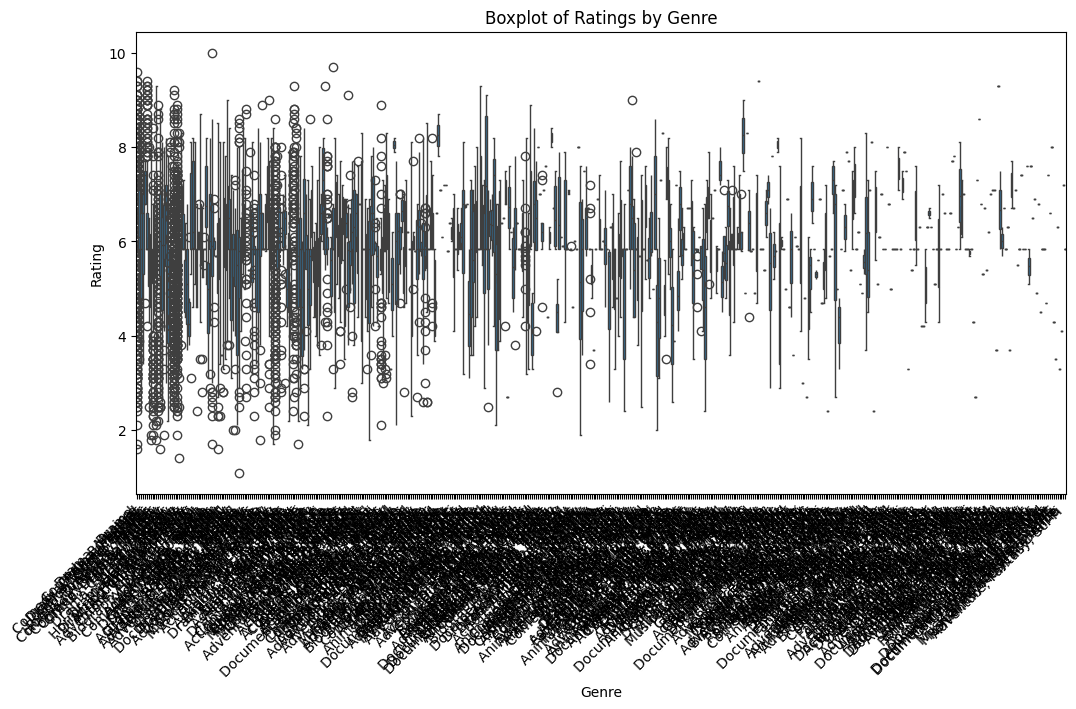

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=data)
plt.title('Boxplot of Ratings by Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

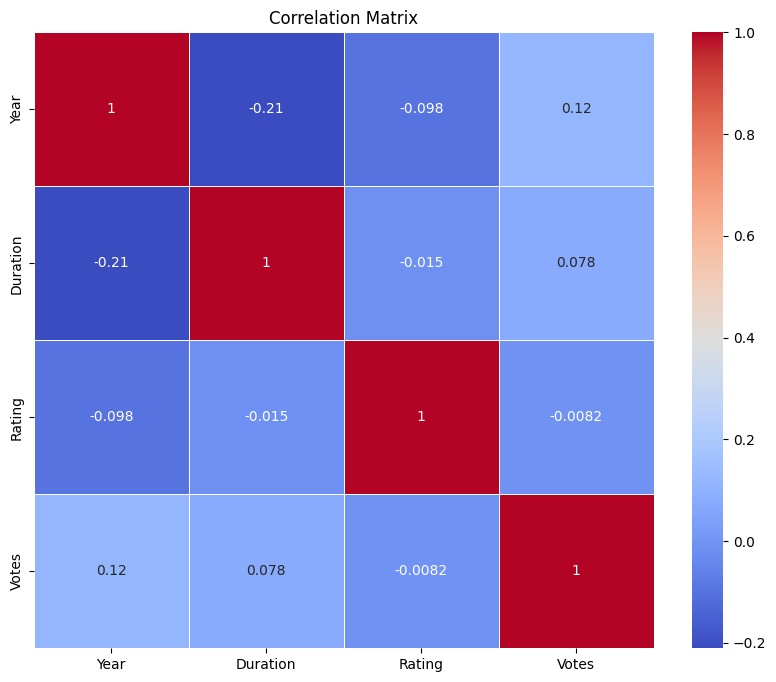

In [41]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [42]:
data.drop('Name', axis=1, inplace=True)
data.drop('Genre', axis=1, inplace=True)
data.drop('Director', axis=1, inplace=True)
data.drop('Actor 1', axis=1, inplace=True)
data.drop('Actor 2', axis=1, inplace=True)
data.drop('Actor 3', axis=1, inplace=True)

In [43]:
data.head(10)

,Year,Duration,Rating,Votes
0,1987.0,128,5.841621,120.839493
1,2019.0,109,7.000000,8.000000
2,2021.0,90,5.841621,120.839493
3,2019.0,110,4.400000,35.000000
4,2010.0,105,5.841621,120.839493
5,1997.0,147,4.700000,827.000000
6,2005.0,142,7.400000,120.839493
7,2008.0,59,5.841621,120.839493
8,2012.0,82,5.600000,326.000000
9,2014.0,116,4.000000,11.000000


SPLIT THE DATA

In [44]:
X = data.drop('Rating', axis=1)
y = data['Rating']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TWO MODELS ARE USED FOR PREDICTION AND COMPARATIVE ANALYSIS
They are:-
> K nearest Neighbour

> decision tree regressor


In [46]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [47]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [48]:
y_pred_knn = knn_regressor.predict(X_test)

In [49]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN Mean Squared Error:", mse_knn)

KNN Mean Squared Error: 0.972469316866318


In [50]:
dt_regressor = DecisionTreeRegressor(random_state=42)


In [51]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [52]:
y_pred_dt = dt_regressor.predict(X_test)

In [53]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Mean Squared Error:", mse_dt)

Decision Tree Mean Squared Error: 1.4195101434970678


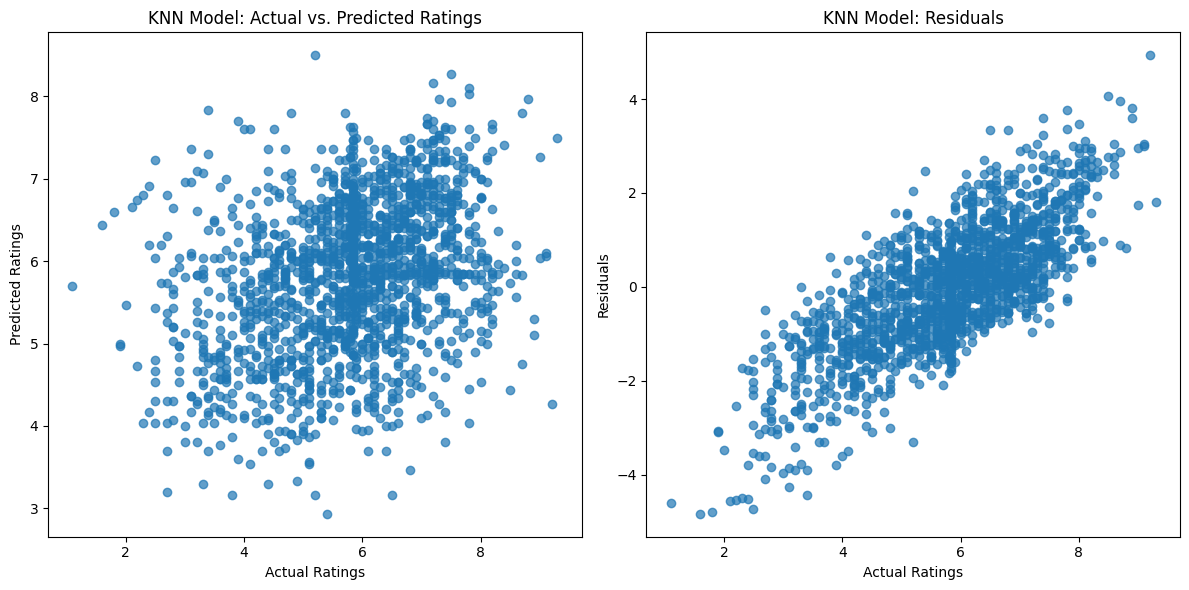

In [54]:
# Scatter plot for KNN model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, alpha=0.7)
plt.title('KNN Model: Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

# Residual plot for KNN model
plt.subplot(1, 2, 2)
residuals_knn = y_test - y_pred_knn
plt.scatter(y_test, residuals_knn, alpha=0.7)
plt.title('KNN Model: Residuals')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


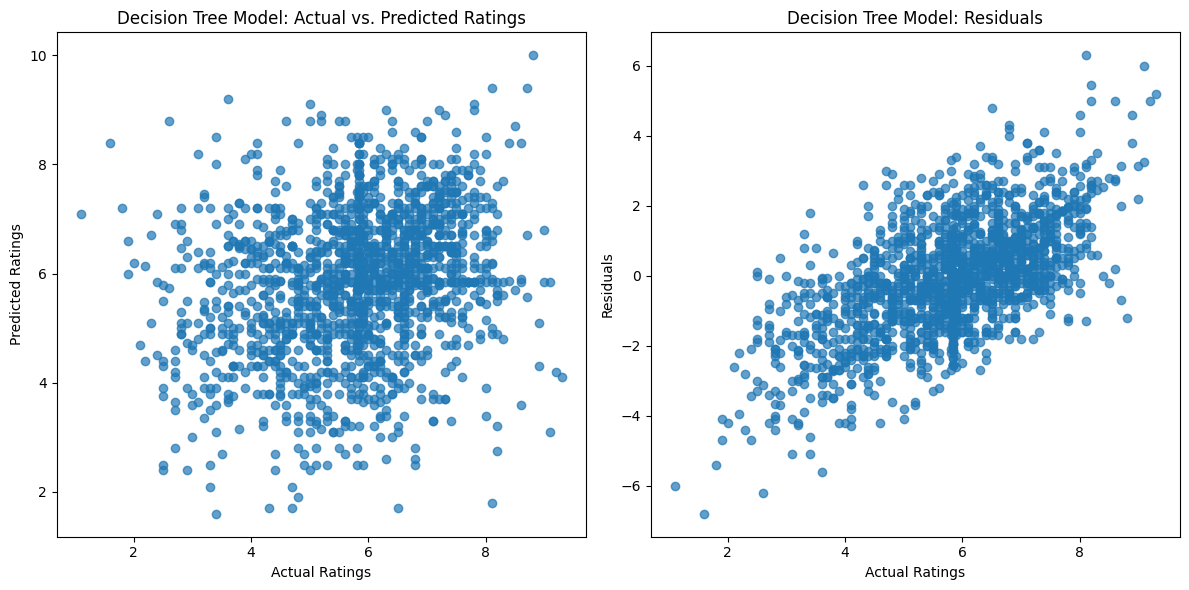

In [55]:

# Scatter plot for Decision Tree model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.title('Decision Tree Model: Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

# Residual plot for Decision Tree model
plt.subplot(1, 2, 2)
residuals_dt = y_test - y_pred_dt
plt.scatter(y_test, residuals_dt, alpha=0.7)
plt.title('Decision Tree Model: Residuals')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()